In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Read Dataset

In [2]:
data=pd.read_csv('training.csv')
data1=pd.read_csv('testing.csv')

In [3]:
data[:10]

,key,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,444,45,management,married,university.degree,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,445,34,admin.,married,basic.9y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,446,47,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,447,42,technician,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,448,57,technician,married,basic.4y,unknown,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,449,57,technician,married,basic.4y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,450,38,blue-collar,married,basic.4y,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,451,57,technician,married,basic.4y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,452,28,student,single,basic.9y,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,453,60,management,married,university.degree,no,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
from collections import Counter
Counter(data["y"])

Counter({'no': 3985, 'yes': 185})

In [5]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

data=data.apply(LabelEncoder().fit_transform)

In [6]:
data

,key,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,25,4,1,5,0,2,0,1,2,...,0,2,0,1,1,2,2,3,0,0
1,1,14,0,1,2,0,0,0,1,2,...,0,2,0,1,1,2,2,3,0,0
2,2,27,1,1,6,1,0,0,1,2,...,0,2,0,1,1,2,2,3,0,0
3,3,22,9,1,4,0,0,0,1,2,...,0,2,0,1,1,2,2,3,0,1
4,4,37,9,1,0,1,0,2,1,2,...,0,2,0,1,1,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,4165,20,1,1,2,0,2,0,0,3,...,0,2,0,1,0,0,0,0,1,0
4166,4166,17,0,1,5,0,0,0,0,3,...,0,2,0,1,0,0,0,0,1,0
4167,4167,12,9,1,5,0,2,0,0,3,...,0,2,0,1,0,0,0,0,1,0
4168,4168,18,2,1,3,0,2,0,0,3,...,1,2,0,1,0,0,0,0,1,0


# Separate Target and Features

In [7]:
target=data["y"]
key1=data1["key"]
data.drop(["y"], axis=1, inplace=True)

In [8]:
data.drop(["pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","nr.employed","euribor3m","contact","month"], axis=1, inplace=True)

In [9]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

df=data.apply(LabelEncoder().fit_transform)

# Resampling

In [10]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE
ada = ADASYN()
X_res, y_res = ada.fit_resample(df, target)

In [11]:
from collections import Counter
Counter(target)

Counter({0: 3985, 1: 185})

In [12]:
data1.drop(["pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","nr.employed","euribor3m","contact","month"], axis=1, inplace=True)

In [13]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

df1=data1.apply(LabelEncoder().fit_transform)

# Feature Importance 

ETC


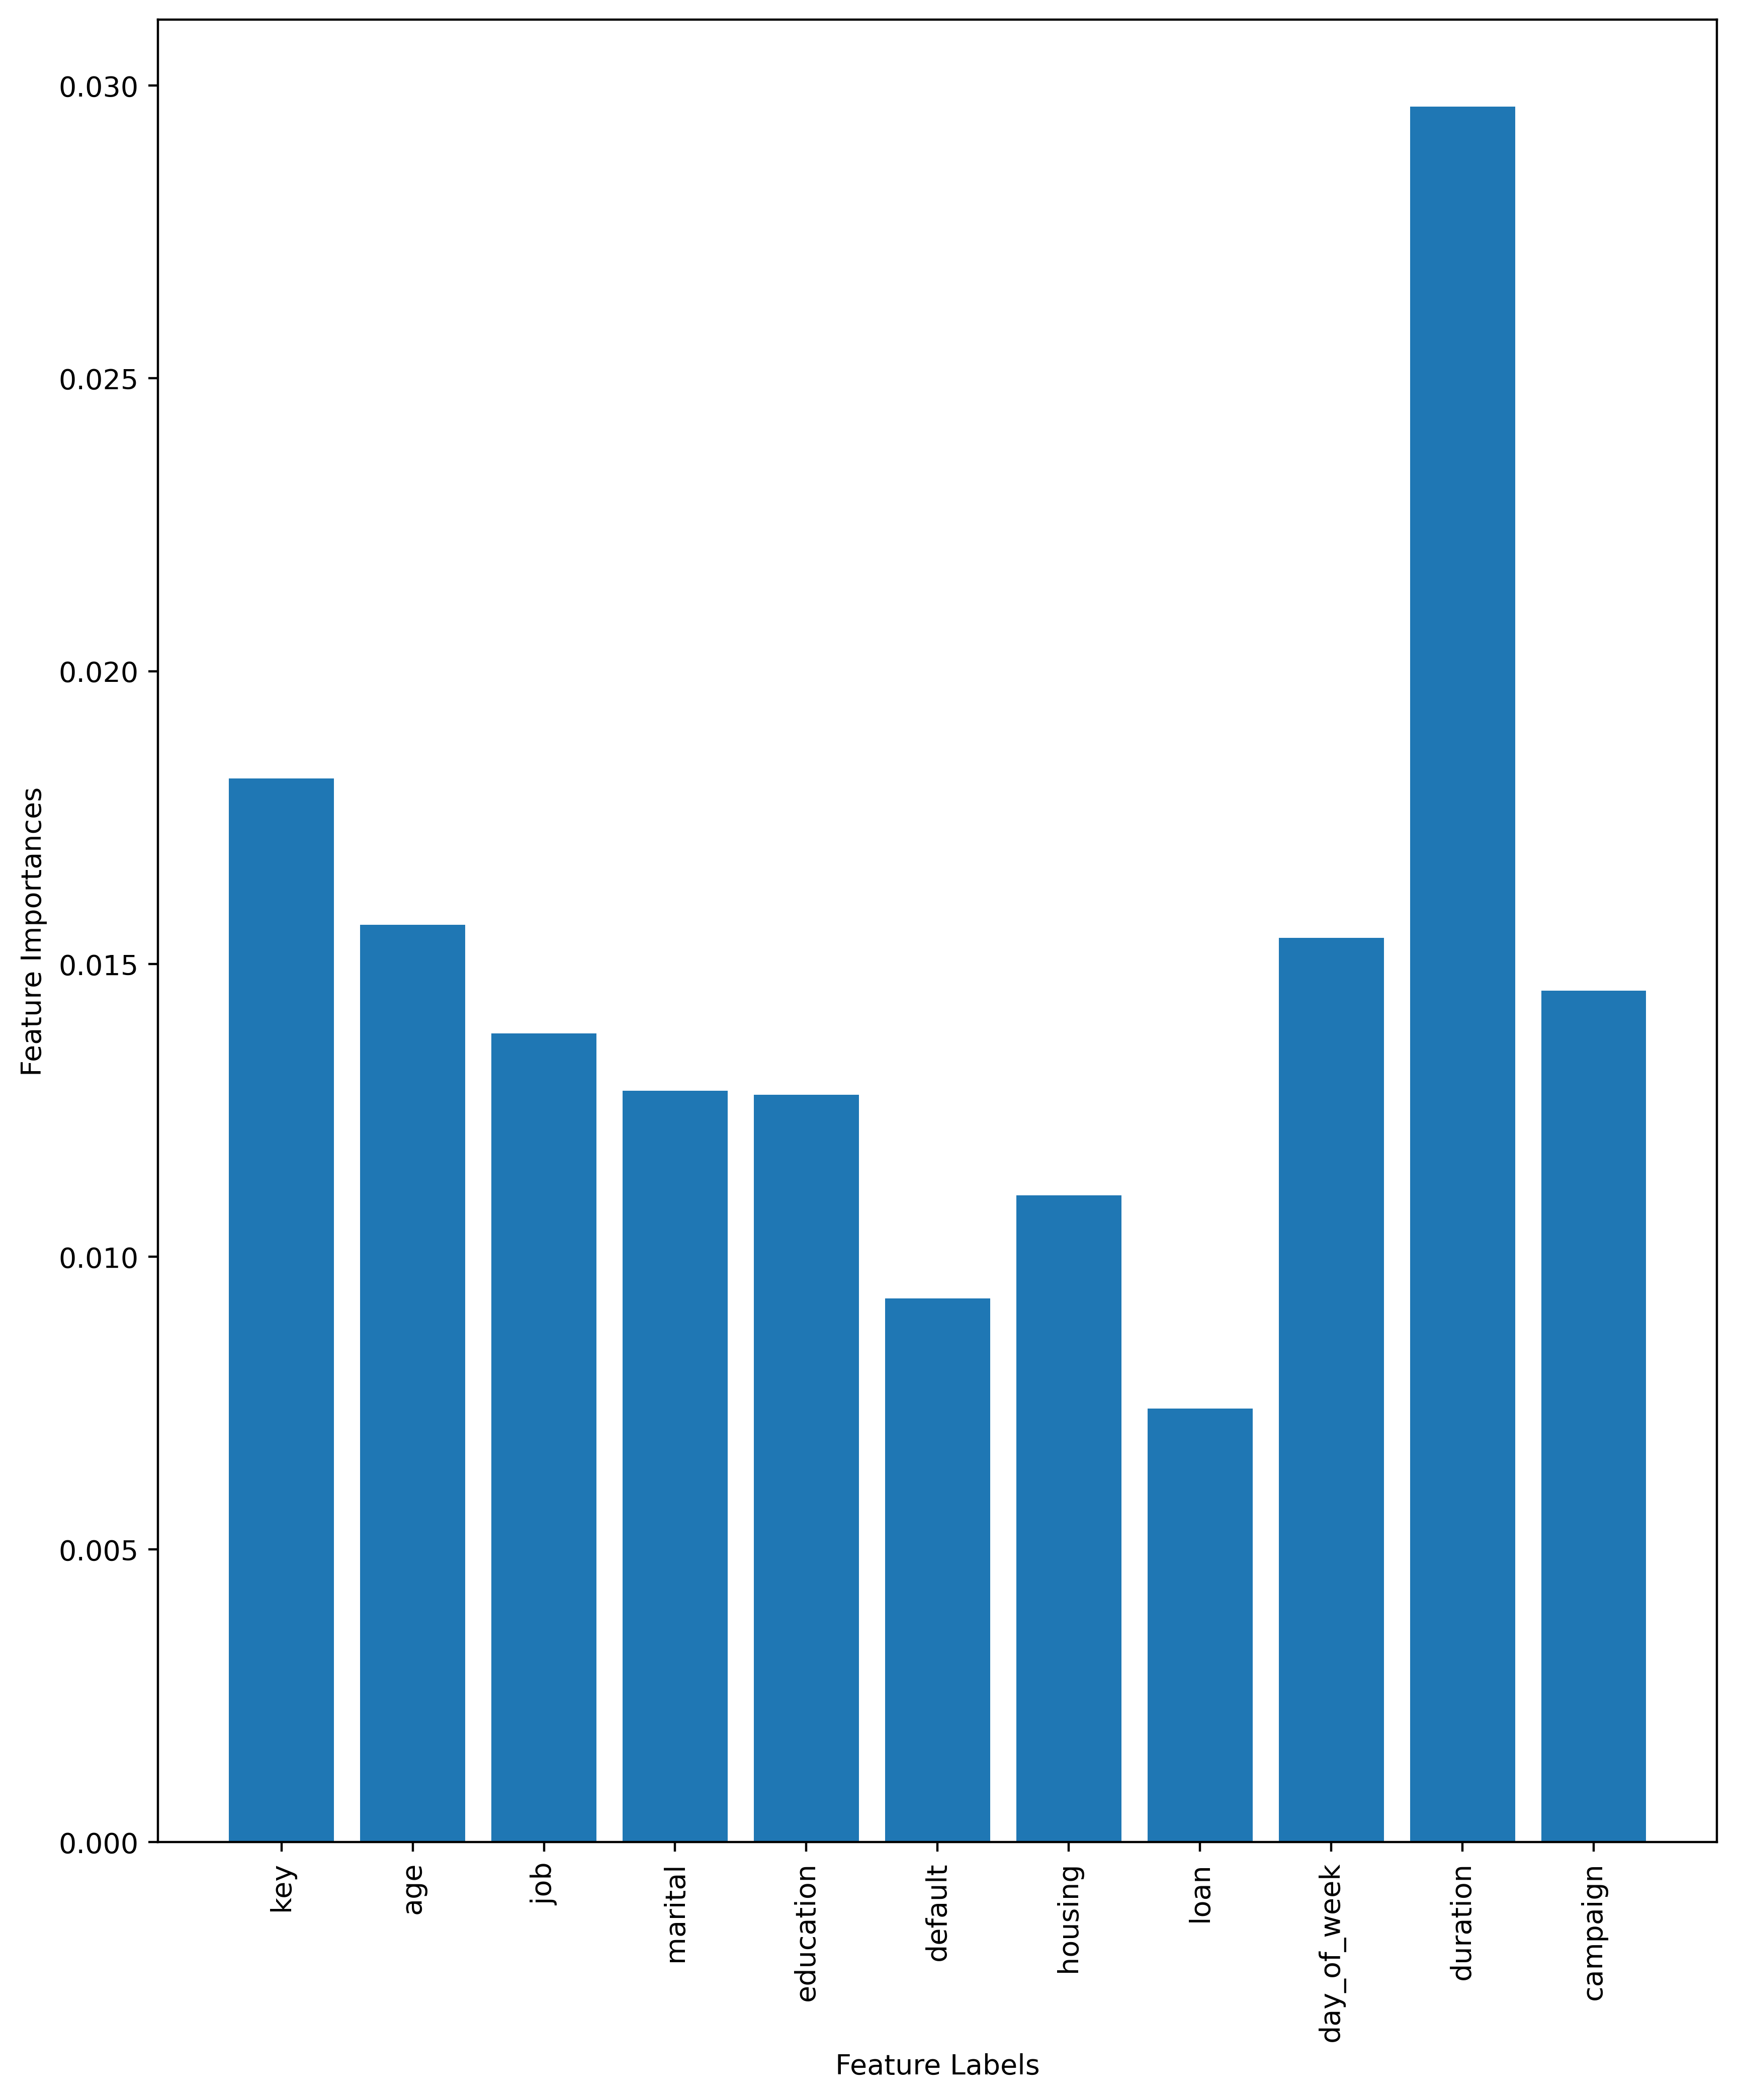

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=20)
plt.figure(1,figsize=(10, 12),dpi=400)
X=df
y=target

# Training the model
dt.fit(X, y)

# Computing the importance of each feature
feature_importance = dt.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in dt.estimators_], axis = 0)

# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xticks(rotation=90)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.show()

# Split Training and testing Sets

In [15]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.15, shuffle=True)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
print("DT")
dt=DecisionTreeClassifier(max_depth=20)
dtPre=dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,dtPre))
print(classification_report(y_test,dtPre))
print(confusion_matrix(y_test,dtPre))

DT
0.952076677316294
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       593
           1       0.56      0.45      0.50        33

    accuracy                           0.95       626
   macro avg       0.76      0.72      0.74       626
weighted avg       0.95      0.95      0.95       626

[[581  12]
 [ 18  15]]


# GradientBoostingClassifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
a = GradientBoostingClassifier(max_depth=300, learning_rate=0.2, n_estimators=350, random_state=52)
print("GBM")
a_pred = a.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,a_pred))
print(classification_report(y_test,a_pred))
print(confusion_matrix(y_test,a_pred))

GBM
0.952076677316294
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       593
           1       0.56      0.42      0.48        33

    accuracy                           0.95       626
   macro avg       0.76      0.70      0.73       626
weighted avg       0.95      0.95      0.95       626

[[582  11]
 [ 19  14]]


# AdaBoostClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=300, random_state=5,learning_rate=0.8)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)  
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

ADA
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       593
           1       0.64      0.42      0.51        33

    accuracy                           0.96       626
   macro avg       0.80      0.71      0.74       626
weighted avg       0.95      0.96      0.95       626

[[585   8]
 [ 19  14]]


# Support Vector Classifier

In [20]:
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='poly', C=5.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


SVC
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       593
           1       0.00      0.00      0.00        33

    accuracy                           0.95       626
   macro avg       0.47      0.50      0.49       626
weighted avg       0.90      0.95      0.92       626

[[593   0]
 [ 33   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, random_state=5, max_depth=30) 
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

RF
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       593
           1       0.92      0.33      0.49        33

    accuracy                           0.96       626
   macro avg       0.94      0.67      0.73       626
weighted avg       0.96      0.96      0.96       626

[[592   1]
 [ 22  11]]


# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
print("KNN")
rfc = KNeighborsClassifier() 
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

KNN
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       593
           1       0.69      0.33      0.45        33

    accuracy                           0.96       626
   macro avg       0.83      0.66      0.71       626
weighted avg       0.95      0.96      0.95       626

[[588   5]
 [ 22  11]]


# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
print("Naive Bayes")
rfc = GaussianNB() 
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

Naive Bayes
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       593
           1       0.55      0.79      0.65        33

    accuracy                           0.96       626
   macro avg       0.77      0.88      0.81       626
weighted avg       0.96      0.96      0.96       626

[[572  21]
 [  7  26]]


# ExtraTreesClassifier

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
b = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=20)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,b_pred))
print(confusion_matrix(y_test,b_pred))

ETC
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       593
           1       0.75      0.27      0.40        33

    accuracy                           0.96       626
   macro avg       0.86      0.63      0.69       626
weighted avg       0.95      0.96      0.95       626

[[590   3]
 [ 24   9]]


# LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
print("LR")
# 2. instantiate a logistic regression model
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=2.0)
# 3. train the model using X_train_dtm
x=logreg.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))


LR
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       593
           1       0.76      0.48      0.59        33

    accuracy                           0.96       626
   macro avg       0.87      0.74      0.79       626
weighted avg       0.96      0.96      0.96       626

[[588   5]
 [ 17  16]]


# Ensemble Model

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
r1 = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
r2 = RandomForestClassifier(n_estimators=200, random_state=5, max_depth=30) 
r3 = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=30)
er = VotingClassifier([('etc1', r3),('etc', r3)],voting="hard")
print("Ensemble Model")
x=er.fit(X_train, y_train)

y_pred_class = er.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))


Ensemble Model
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       593
           1       0.73      0.24      0.36        33

    accuracy                           0.96       626
   macro avg       0.84      0.62      0.67       626
weighted avg       0.95      0.96      0.94       626

[[590   3]
 [ 25   8]]


# LSTM

# Weight Testing

# Final Model

In [27]:
from sklearn.linear_model import LogisticRegression
print("LR")
w = {0:1, 1:0.226}
# 2. instantiate a logistic regression model
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=2.0,class_weight=w)
# 3. train the model using X_train_dtm
b_pred = logreg.fit(df, target).predict(df1)

LR


In [28]:
b_pred

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
from collections import Counter
Counter(b_pred)

Counter({0: 30247, 1: 6771})

In [30]:
data1["y"]=b_pred
data1["key"]=key1

In [31]:
naming = {1:'yes', 0: 'no'}
data1 = data1.replace({"y": naming})

In [32]:
data2 = data1[["key", "y"]].copy()
data2.to_csv("INDPrediction49.csv", index=False)

In [33]:
from collections import Counter
Counter(data1["y"])

Counter({'no': 30247, 'yes': 6771})

# End